# setup (good to do before the start of project)

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14) # font size
plt.rc('axes', labelsize=14, titlesize=14) # axes labelsize and title size
plt.rc('legend', fontsize=14) # legend fontsize
plt.rc('xtick', labelsize=10) # Xtick label size
plt.rc('ytick', labelsize=10) # ytick label size

# function to save figure.

from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Clustering

<b>Introduction - Classification vs Clustering</b>

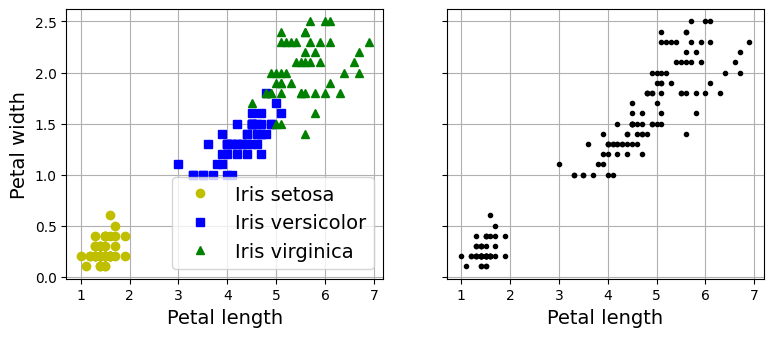

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X  = data.data
y = data.target
data.target_names

plt.figure(figsize=(9,3.5))

plt.subplot(121)
plt.plot(X[y == 0,2],X[y==0,3],"yo",label="Iris setosa")
plt.plot(X[y==1,2],X[y==1,3],"bs",label="Iris versicolor")
plt.plot(X[y == 2,2],X[y==2,3],"g^",label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:,2],X[:,3],c="k",marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft = False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

# Clustering:
1) clustering: it is the task of identifying similar instances and assigning them
to clusters, or groups of similar instances.

2) Application:
Customer Segmentation, Data analysis, Dimensionality Reduction,  Feature Engineering, Anomaly Detection, Semi-supervised learning, Search engines, Image Segmentation. 

# K-means:
1) The KMeans instance preserves the
predicted labels of the instances it was trained on, available via the labels_
instance variable.

In [3]:
"""Let’s train a k-means clusterer on this dataset. It will try to find each blob’s
center and assign each instance to the closest blob"""

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[0.2,2.3],[-1.5,2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])

blob_std = np.array([0.4,0.3,0.1,0.1,0.1])
# y contains the cluster IDs, but we will not use them; that's what we want to predict
X, y = make_blobs(n_samples=2000, centers = blob_centers, cluster_std = blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)


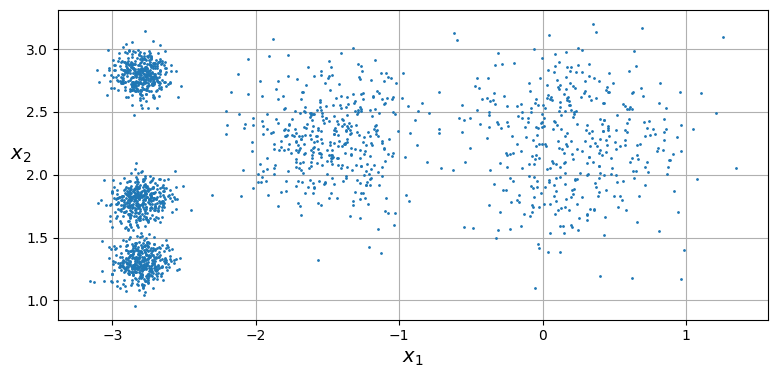

In [6]:
# extra code – this cell generates and saves Figure 9–2

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
save_fig("blobs_plot")
plt.show()

In [4]:
"""Each instance will be assigned to one of the five clusters. In the context of
clustering, an instance’s label is the index of the cluster to which the
algorithm assigns this instance; this is not to be confused with the class
labels in classification, which are used as targets"""
print(y_pred)
y_pred is kmeans.labels_

[0 0 4 ... 3 1 0]


True

In [5]:
#5 centroids that algo found
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [5]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0])

In [9]:
# assign new instances to cluster whose centroid is closest
import numpy as np
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3])

If you plot the cluster’s decision boundaries, you get a Voronoi tessellation:
see Figure 9-3, where each centroid is represented with an X.

Decision Boundary

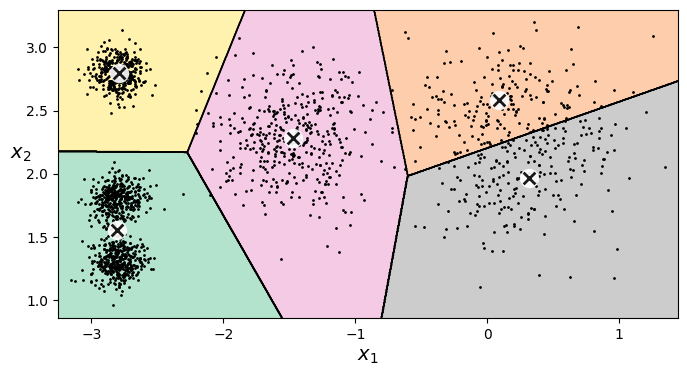

In [10]:
# Fig 9-3: Generate decision boundaries of clustering algorithm
def plot_data(X):
    plt.plot(X[:,0],X[:,1],'k.',markersize=2)

def plot_centroids(centroids,weights=None,circle_color='w',cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10] # only have centroids whose weight is greater than 1/10 of max_weight
    plt.scatter(centroids[:,0],centroids[:,1],
                marker='o',s=35,linewidths=8,
                color=circle_color,zorder=10, alpha=0.9) # Zorder: controls the layering or stacking order of the plot elements.
   
    plt.scatter(centroids[:,0],centroids[:,1],
                marker='x',s=2,linewidths=12,
                color=cross_color,zorder=11, alpha=0.9) # Zorder=11 : to keep x centroids marks above the circle marks.
    
def plot_decision_boundaries(clusterer, X , resolution=1000,show_centroids=True,
                             show_xlabels=True,show_ylabels=True):
    mins = X.min(axis=0) - 0.1 #grid to cover more space than just the data's range while calculating the min values along each feature of the data X
    maxs = X.max(axis=0) + 0.1 # grid extends slightly beyond the data's maximum while calculating the max values along each feature of the data X
    
    #np.linspace: creates a 1D arr of evenly spaced values between the mins and maxs values for the first and second features(0 & 1).


    #np.meshgrid : creates a 2 2D arr, representing all combinations of these values (creating a grid of points).

    xx, yy = np.meshgrid(np.linspace(mins[0],maxs[0],resolution),
                         np.linspace(mins[1],maxs[1],resolution))
    
    Z = clusterer.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape) # models preds in 2D array

    # This function creates a filled contour plot, where areas with different values of Z are colored according to the colormap. It's often used to visualize regions of different classifications or probability values.
    plt.contourf(Z,extent=(mins[0],maxs[0],mins[1],maxs[1]),
                 cmap="Pastel2")

    # This function draws contour lines on the plot to indicate where certain values of Z occur (e.g., decision boundaries). It creates a simpler, non-filled version of the contour plot.
    plt.contour(Z,extent=(mins[0],maxs[0],mins[1],maxs[1]),
                 linewidths=1,colors='k')
    plot_data(X)

    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    
    if show_xlabels:
        plt.xlabel("$x_1$")

    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$",rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans,X)
plt.show()
    

<b>Hard Clustering vs Soft Clustering</b>

Rather than arbitrarily choosing the closest cluster for each instance, which is called hard clustering, it might be better to measure the distance of each instance to all 5 centroids. This is what the transform() method does:

In [12]:
kmeans.transform(X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

In [13]:
# You can verify that this is indeed the Euclidian distance between each instance and each centroid:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2)
               - kmeans.cluster_centers_, axis=2).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

# Insights:
> the kmeans algorithm does not behave very well when the blobs have very
different diameters because all it cares about when assigning an instance to
a cluster is the distance to the centroid.

>Instead of assigning each instance to a single cluster, which is called hard
clustering, it can be useful to give each instance a score per cluster, which is
called soft clustering. The score can be the distance between the instance
and the centroid or a similarity score (or affinity), such as the Gaussian
radial basis function.

In [12]:
#  the transform() method measures the distance from each instance to every centroid:
kmeans.transform(X_new).round(2)

"""In this example, the first instance in X_new is located at a distance of about
2.81 from the first centroid, 0.33 from the second centroid, 2.90 from the
third centroid, 1.49 from the fourth centroid, and 2.89 from the fifth
centroid. If you have a high-dimensional dataset and you transform it this
way, you end up with a k-dimensional dataset: this transformation can be a
very efficient nonlinear dimensionality reduction technique. Alternatively,
you can use these distances as extra features to train another model,"""

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

<b>The K-means algorithm:</b>

The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:
* First initialize $k$ centroids randomly: e.g., $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

>NOTE:
The computational complexity of the algorithm is generally linear with regard to the
number of instances m, the number of clusters k, and the number of dimensions n.
However, this is only true when the data has a clustering structure. If it does not, then in
the worst-case scenario the complexity can increase exponentially with the number of
instances. In practice, this rarely happens, and k-means is generally one of the fastest
clustering algorithms.

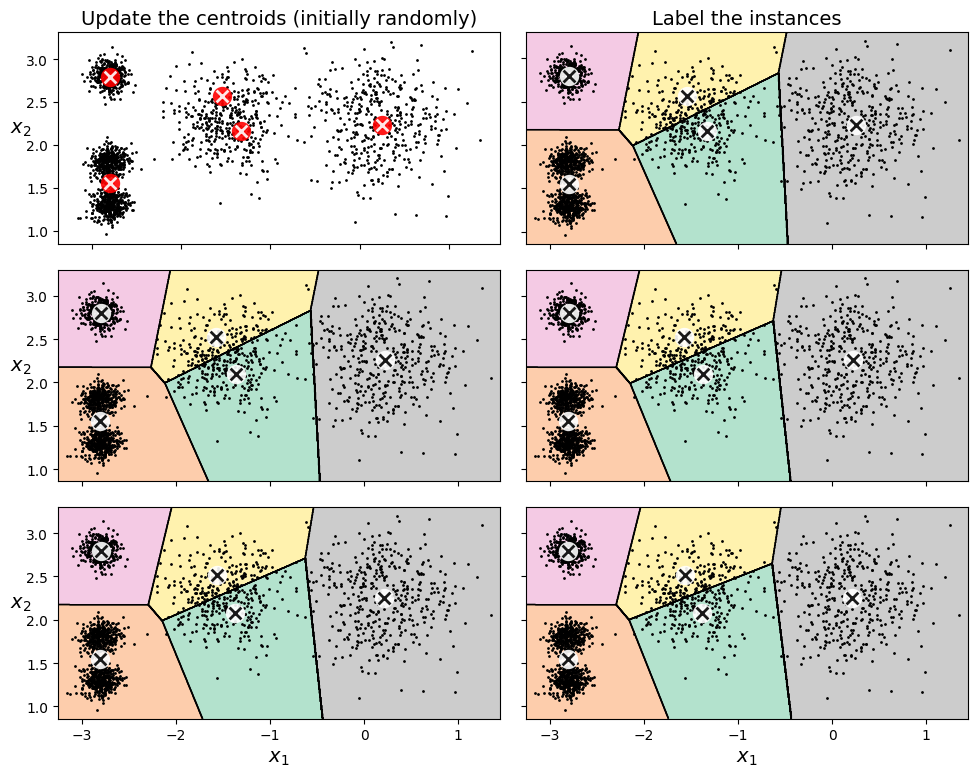

In [14]:
# Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:
# extra code – this cell generates and saves Figure 9–4

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

<b>K-Means Variability</b>

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:


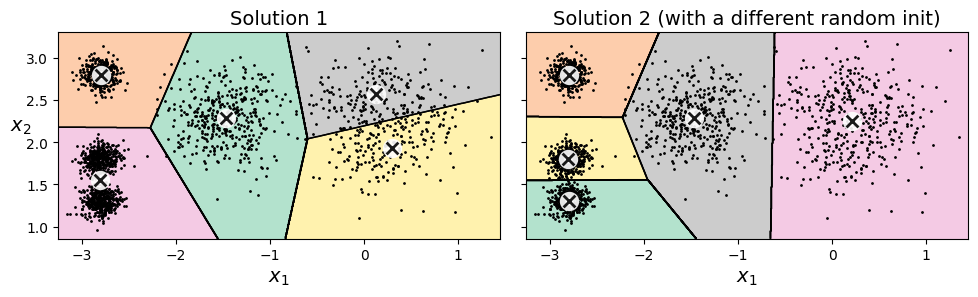

In [15]:
# extra code – this cell generates and saves Figure 9–5

def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=9)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

In [16]:
"""If you happen to know approximately where the centroids should be (e.g., if
you ran another clustering algorithm earlier), then you can set the init
hyperparameter to a NumPy array containing the list of centroids, and set
n_init to 1"""

good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans =  KMeans(n_clusters=5, init=good_init, n_init=1,random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

In [ ]:
"""Another solution is to run the algorithm multiple times with different
random initializations and keep the best solution. The number of random
initializations is controlled by the n_init hyperparameter: by default it is
equal to 10, which means that the whole algorithm described earlier runs 10
times when you call fit(), and Scikit-Learn keeps the best solution. But
how exactly does it know which solution is the best? It uses a performance
metric! That metric is called the model’s inertia, which is the sum of the
squared distances between the instances and their closest centroids. It is
roughly equal to 219.4 for the model on the left in Figure 9-5, 258.6 for the
model on the right in Figure 9-5, and only 211.6 for the model in Figure 9-
3. The KMeans class runs the algorithm n_init times and keeps the model
with the lowest inertia"""


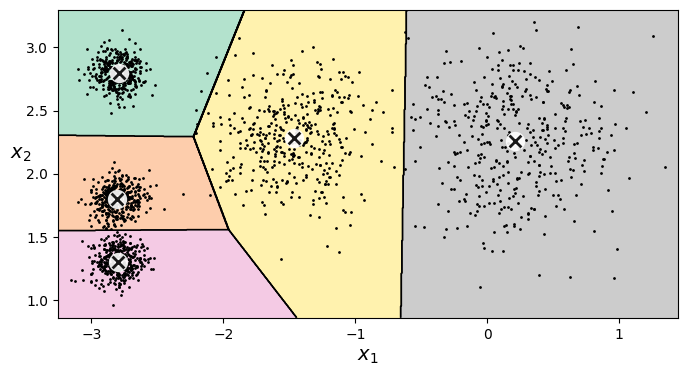

In [18]:
# extra code
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

<b>Inertia</b>

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the inertia metric:

In [17]:
#  a model’s inertia is accessible via the
# inertia_ instance variable
kmeans.inertia_

211.59853725816836

In [20]:
kmeans_rnd_init1.inertia_

219.58201503602294

In [21]:
kmeans_rnd_init2.inertia_

211.59853725816834

As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:

In [22]:
# extra code
X_dist = kmeans.transform(X)
(X_dist[np.arange(len(X_dist)), kmeans.labels_] ** 2).sum()

211.59853725816902

In [23]:
"""The score() method returns the negative inertia. Why negative? Well, it is because a predictor's score() method must always respect the "greater is better" rule.
"""

kmeans.score(X)

-211.59853725816836

3) k-means++ algo working:(KMeans class default init)
(1) Take one centroid c^(1) , chosen uniformly at random from the dataset.
<br>
(2)  Take a new centroid c^(i) , choosing an instance x^(i) with probability $$
$$
\frac{D(x^{(i)})^2}{\sum_{j=1}^m D(x^{(j)})^2}
$$
where D(x^(i)) is the distance between the
instance x and the closest centroid that was already chosen. This
probability distribution ensures that instances farther away from
already chosen centroids are much more likely to be selected as
centroids.
<br>
(3). Repeat the previous step until all k centroids have been chosen.

4) Accelerated k-means:
> Elkan achieved this by exploiting the triangle inequality (i.e.,
that a straight line is always the shortest distance between two points ) and
by keeping track of lower and upper bounds for distances between instances
and centroids.

>Elkan’s algorithm does not always accelerate
training, and sometimes it can even slow down training significantly; it
depends on the dataset. Still, if you want to give it a try, set
algorithm="elkan"

5) mini-batch k-means:
> Instead of using the full dataset at each
iteration, the algorithm is capable of using mini-batches, moving the
centroids just slightly at each iteration. This speeds up the algorithm
(typically by a factor of three to four) and makes it possible to cluster huge
datasets that do not fit in memory


In [ ]:
#  Scikit-Learn implements this algorithm
# in the MiniBatchKMeans class, which you can use just like the KMeans
# class:

from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5,random_state=42)
minibatch_kmeans.fit(X)

<b>Multiple Initializations</b>

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia.

When you set the n_init hyperparameter, Scikit-Learn runs the original algorithm n_init times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets n_init=10.


In [24]:
kmeans_rnd_10_inits = KMeans(n_clusters=5,init="random",n_init=10,
                             random_state=42)
kmeans_rnd_10_inits.fit(X)


KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

As you can see, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia, and assuming  k=5 ).

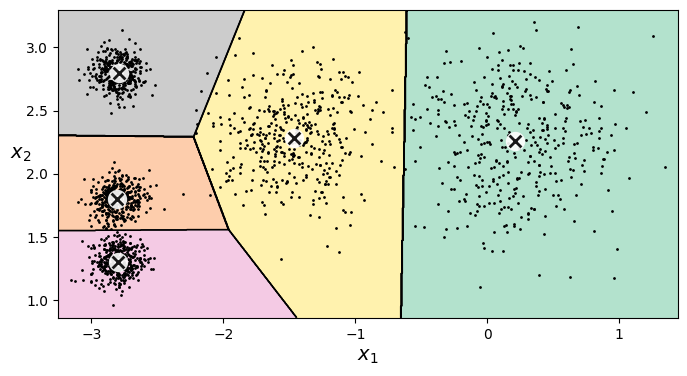

In [25]:
# extra code
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [26]:
kmeans_rnd_10_inits.inertia_

211.59853725816836

### Centroid initialization methods

Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a [2006 paper](https://goo.gl/eNUPw6) by David Arthur and Sergei Vassilvitskii:
* Take one centroid $c_1$, chosen uniformly at random from the dataset.
* Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
* Repeat the previous step until all $k$ centroids have been chosen.

The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce n_init considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

To set the initialization to K-Means++, simply set init="k-means++" (this is actually the default):

### Accelerated K-Means


The K-Means algorithm can sometimes be accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this [2003 paper](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) by Charles Elkan for more details).

For Elkan's variant of K-Means, use `algorithm="elkan"`. For regular KMeans, use `algorithm="full"`. The default is `"auto"`, which uses the full algorithm since Scikit-Learn 1.1 (it used Elkan's algorithm before that).



### Mini-Batch K-Means

Scikit-Learn also implements a variant of the K-Means algorithm that supports mini-batches (see [this paper](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)):

In [27]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

Note: Throughout this notebook, when n_init was not set when creating a MiniBatchKMeans estimator, I explicitly set it to n_init=3 to avoid a warning about the fact that the default value for this hyperparameter will change from 3 to "auto" in Scikit-Learn 1.4.

In [28]:
minibatch_kmeans.inertia_

211.6589937457431

**Using `MiniBatchKMeans` along with `memmap`** (not in the book)

If the dataset does not fit in memory, the simplest option is to use the memmap class, just like we did for incremental PCA in the previous chapter. First let's load MNIST:

In [29]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame=False,parser='auto')

In [30]:
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

In [31]:
filename = "my_mnist.mmap"
X_memmap = np.memmap(filename, dtype='float32', mode='write',
                     shape=X_train.shape)
X_memmap[:] = X_train
X_memmap.flush()

In [32]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10,
                                   n_init=3, random_state=42)
minibatch_kmeans.fit(X_memmap)

MiniBatchKMeans(batch_size=10, n_clusters=10, n_init=3, random_state=42)

Let's plot the inertia ratio and the training time ratio between Mini-batch K-Means and regular K-Means:

100/100

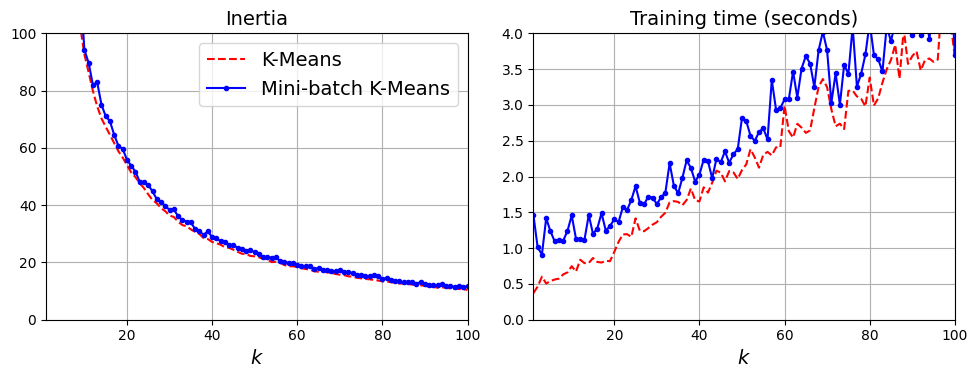

In [33]:
# extra code – this cell generates and saves Figure 9–6

from timeit import timeit

max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
                             globals=globals())
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k, 0, 100])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Training time (seconds)")
plt.axis([1, max_k, 0, 4])
plt.grid()

save_fig("minibatch_kmeans_vs_kmeans_plot")
plt.show()

> Although the mini-batch k-means algorithm is much faster than the regular
k-means algorithm, its inertia is generally slightly worse. You can see this in
Figure 9-6




### Finding the optimal number of clusters

What if the numbert of clusters was set to a lower or greater value than 5

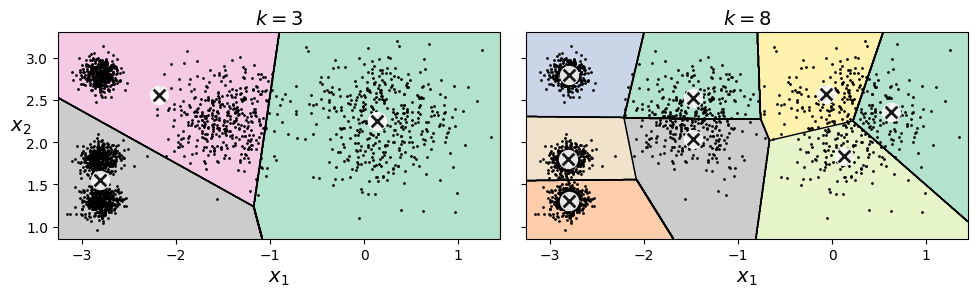

In [34]:
kmeans_k3 = KMeans(n_clusters=3,n_init=10,random_state=42)
kmeans_k8 = KMeans(n_clusters=8,n_init=10,random_state=42)

plot_clusterer_comparison(kmeans_k3,kmeans_k8,X,"$k=3$","$k=8$")
save_fig("bad_b_clusters_plot")
plt.show()

In [35]:
kmeans_k3.inertia_, kmeans_k8.inertia_

(653.2167190021553, 119.22484592677122)

No, we cannot simply take the value of  k  that minimizes the inertia, since it keeps getting lower as we increase  k . Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of  k  and analyze the resulting curve:

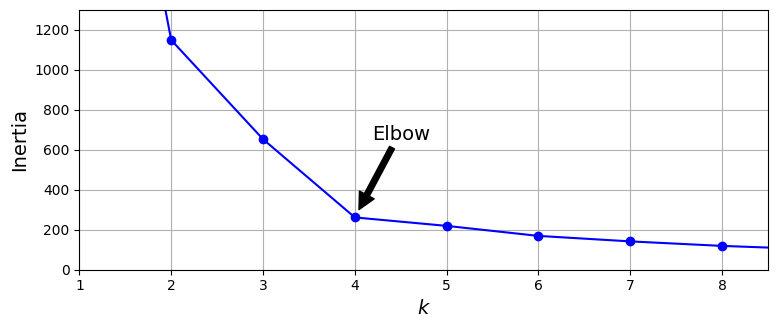

In [36]:
# extra code – this cell generates and saves Figure 9–8

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
save_fig("inertia_vs_k_plot")
plt.show()

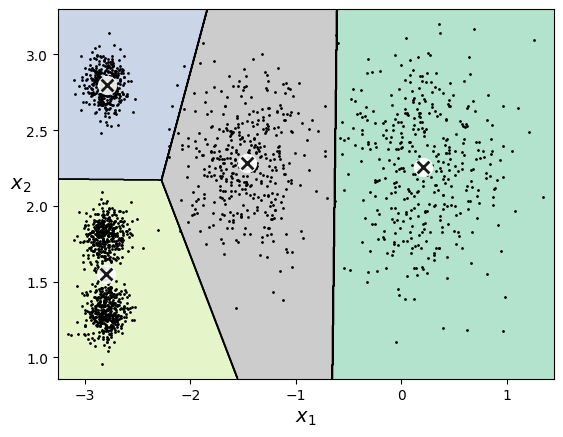

In [37]:
# extra code
plot_decision_boundaries(kmeans_per_k[4 - 1], X)
plt.show()

This technique for choosing the best value for the number of clusters is
rather coarse.

Another approach is to look at the _silhouette score_, which is the mean _silhouette coefficient_ over all the instances. An instance's silhouette coefficient is equal to (_b_ - _a_) / max(_a_, _b_) where _a_ is the mean distance to the other instances in the same cluster (it is the _mean intra-cluster distance_), and _b_ is the _mean nearest-cluster distance_, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes _b_, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.




In [38]:
# To compute the silhouette score, you can use Scikit-Learn’s
# silhouette_score() function, giving it all the instances in the dataset and
# the labels they were assigned

from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans.labels_)

0.655517642572828

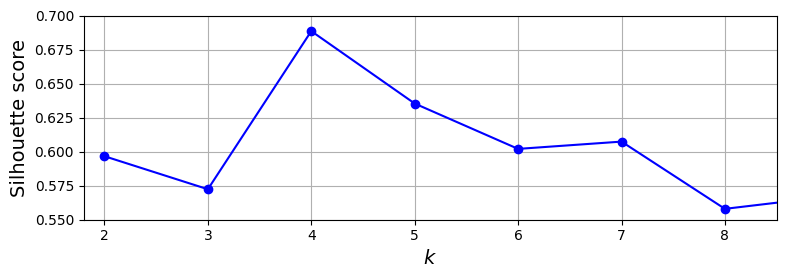

In [39]:
# extra code – this cell generates and saves Figure 9–9

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
save_fig("silhouette_score_vs_k_plot")
plt.show()

As you can see, this visualization is much richer than the previous one: in particular, although it confirms that  k=4  is a very good choice, but it also underlines the fact that  k=5  is quite good as well.

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram:

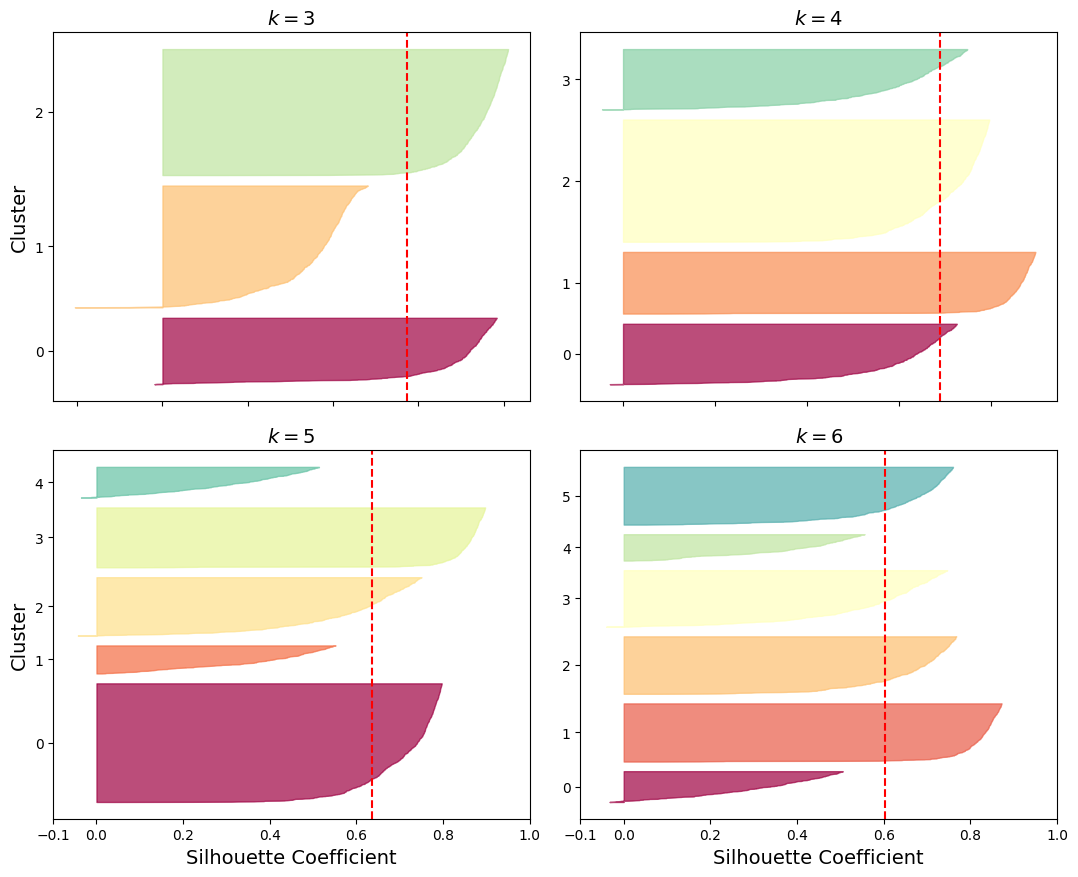

In [40]:
# extra code – this cell generates and saves Figure 9–10

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

save_fig("silhouette_analysis_plot")
plt.show()

As you can see,  k=5  looks like the best option here, as all clusters are roughly the same size, and they all cross the dashed line, which represents the mean silhouette score.

### Limits of k-means:
> it is necessary to run the algorithm several times to
avoid suboptimal solutions

>  you need to specify the number of clusters,
which can be quite a hassle.

> k-means does not behave very well
when the clusters have varying sizes, different densities, or nonspherical
shapes.

>For example, Figure 9-11 shows how k-means clusters a dataset
containing three ellipsoidal clusters of different dimensions, densities, and
orientations.

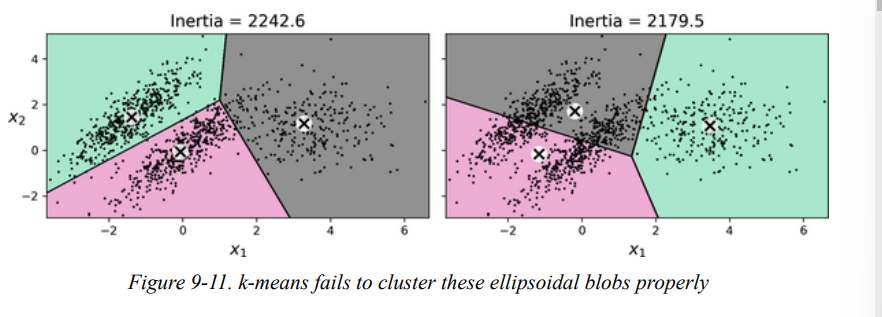


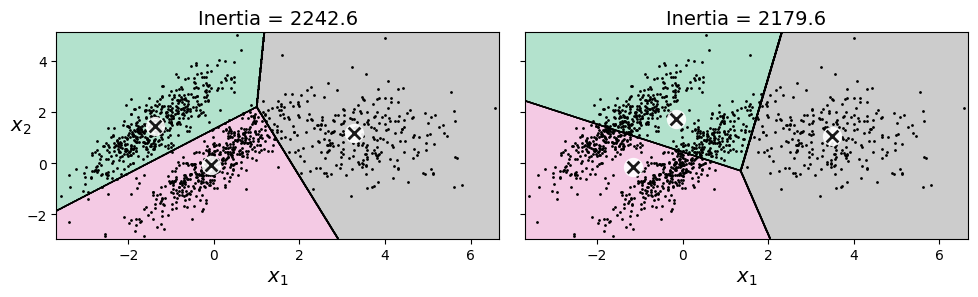

In [41]:
# Let's generate a more difficult dataset, with elongated blobs and varying densities, and show that K-Means struggles to cluster it correctly:

# extra code – this cell generates and saves Figure 9–11

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f"Inertia = {kmeans_good.inertia_:.1f}")

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"Inertia = {kmeans_bad.inertia_:.1f}")

save_fig("bad_kmeans_plot")
plt.show()


> TIP: It is important to scale the input features (see Chapter 2) before you run k-means, or the
clusters may be very stretched and k-means will perform poorly. Scaling the features
does not guarantee that all the clusters will be nice and spherical, but it generally helps
k-means.


### Using Clustering for image segmentation:


In [42]:
# Download the ladybug image:

import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [43]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [44]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

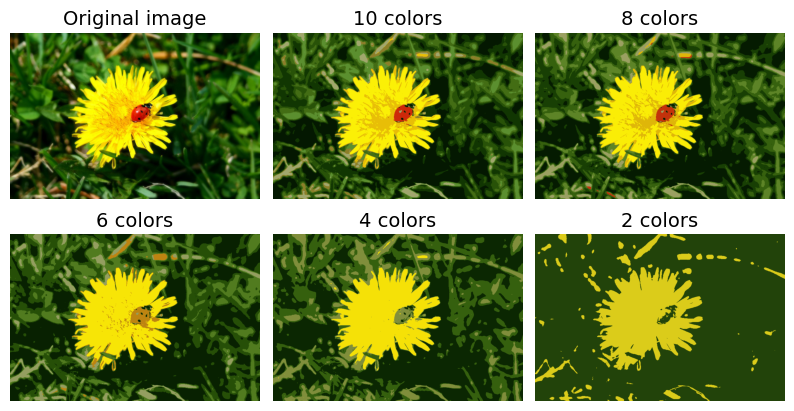

In [45]:
# extra code – this cell generates and saves Figure 9–12

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

save_fig('image_segmentation_plot', tight_layout=False)
plt.show()

### Using Clusetering for Semi-supervised learning:

Another use case for clustering is semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances.

Let's tackle the digits dataset which is a simple MNIST-like dataset containing 1,797 grayscale 8×8 images representing digits 0 to 9.


In [55]:
#simple MNIST-like dataset
# containing 1,797 grayscale 8 × 8 images representing the digits 0 to 9.
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

"""We will pretend we only have labels for 50 instances. To get a baseline
performance, let’s train a logistic regression model on these 50 labeled
instances"""

from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

log_reg.score(X_test, y_test)


0.7581863979848866

In [56]:
# extra code – measure the accuracy when we use the whole training set
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9093198992443325

It's much less than earlier of course. Let's see how we can do better. First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We will call these images the representative images:

In [57]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

Now let's plot these representative images and label them manually:

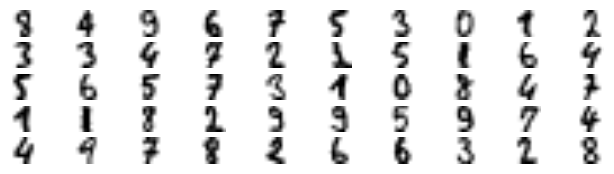

In [58]:
# extra code – this cell generates and saves Figure 9–13

"""First, let’s cluster the
training set into 50 clusters. Then, for each cluster, we’ll find the image
closest to the centroid. We’ll call these images the representative images"""


plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_plot", tight_layout=False)
plt.show()

In [67]:
# Let's look at each image and manually label them:
y_representative_digits = np.array([
    1, 3, 6, 0, 7, 9, 2, 4, 8, 9,
    5, 4, 7, 1, 2, 6, 1, 2, 5, 1,
    4, 1, 3, 3, 8, 8, 2, 5, 6, 9,
    1, 4, 0, 6, 8, 3, 4, 6, 7, 2,
    4, 1, 0, 7, 5, 1, 9, 9, 3, 7
])
"""Now we have a dataset with just 50 labeled instances, but instead of being
random instances, each of them is a representative image of its cluster"""

log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)


0.06801007556675064

In [64]:
# label propogation: popogating the labels to all the other instances in the same cluster.
y_train_propogated = np.empty(len(X_train),dtype=np.int64)
for i in range(k):
    y_train_propogated[kmeans.labels_ == i] = y_representative_digits[i] 

In [65]:
lr = LogisticRegression()
lr.fit(X_train,y_train_propogated)
lr.score(X_test,y_test)

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.06801007556675064

In [71]:
""" Let’s see if we can do even
better by ignoring the 1% of instances that are farthest from their cluster
center: this should eliminate some outliers. The following code first
computes the distance from each instance to its closest cluster center, then
for each cluster it sets the 1% largest distances to –1. Lastly, it creates a set
without these instances marked with a –1 distance"""

percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)),kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_==i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist,percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propogated = (X_cluster_dist != -1)
X_train_partially_propogated = X_train[partially_propogated]
y_train_partially_propogated = y_train_propogated[partially_propogated]

lr = LogisticRegression(max_iter=10_000)
lr.fit(X_train_partially_propogated,y_train_partially_propogated)
lr.score(X_test,y_test)

0.07808564231738035

> TIP:
Scikit-Learn also offers two classes that can propagate labels automatically:
LabelSpreading and LabelPropagation in the sklearn.semi_supervised package.
Both classes construct a similarity matrix between all the instances, and iteratively
propagate labels from labeled instances to similar unlabeled instances. There’s also a
very different class called SelfTrainingClassifier in the same package: you give it a
base classifier (such as a RandomForestClassifier) and it trains it on the labeled
instances, then uses it to predict labels for the unlabeled samples. It then updates the
training set with the labels it is most confident about, and repeats this process of training
and labeling until it cannot add labels anymore. These techniques are not magic bullets,
but they can occasionally give your model a little boost.

# ACTIVE LEARNING
To continue improving your model and your training set, the next step
could be to do a few rounds of active learning, which is when a human
expert interacts with the learning algorithm, providing labels for
specific instances when the algorithm requests them. There are many
different strategies for active learning, but one of the most common
ones is called uncertainty sampling. Here is how it works:
1. The model is trained on the labeled instances gathered so far, and
this model is used to make predictions on all the unlabeled
instances.
2. The instances for which the model is most uncertain (i.e., where its
estimated probability is lowest) are given to the expert for labeling.
3. You iterate this process until the performance improvement stops
being worth the labeling effort.
Other active learning strategies include labeling the instances that
would result in the largest model change or the largest drop in the
model’s validation error, or the instances that different models disagree
on (e.g., an SVM and a random forest).


# DBSCAN: (density-based spatial clustering of applications with noise):

>algorithm defines clusters as continuous regions of high density

1. Working:

> For each instance, the algorithm counts how many instances are
located within a small distance ε (epsilon) from it. This region is called
the instance’s ε-neighborhood.

> If an instance has at least min_samples instances in its ε-neighborhood
(including itself), then it is considered a core instance. In other words,
core instances are those that are located in dense regions.

>All instances in the neighborhood of a core instance belong to the
same cluster. This neighborhood may include other core instances;
therefore, a long sequence of neighboring core instances forms a single
cluster.

> Any instance that is not a core instance and does not have one in its
neighborhood is considered an anomaly.



In [72]:
# works well when all clusters are well seperated by low-density regions:

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000,noise=0.05)
dbscan = DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [75]:
# The labels of all the instances are now available in the labels_ instance variable
"""Notice that some instances have a cluster index equal to –1, which means
that they are considered as anomalies by the algorithm. """

dbscan.labels_[:10]

array([ 0, -1,  1,  0,  9,  2,  3,  0,  1,  4], dtype=int64)

In [77]:
#  The indices of the core instances are available in the core_sample_indices_ instance
# variable, and the core instances themselves are available in the components_ instance variable

print("sample indices: ",dbscan.core_sample_indices_[:10])
print("components: ",dbscan.components_[:10])

sample indices:  [ 0  2  5  6  7  8  9 10 11 12]
components:  [[ 1.98058689  0.48451119]
 [-0.91030169  0.27804251]
 [ 0.63356212 -0.47021016]
 [ 0.7932524   0.59885044]
 [ 1.92747608  0.30125997]
 [-0.97027233  0.18518066]
 [-0.56196118  0.85437805]
 [ 1.97421901  0.27069117]
 [ 0.65752998  0.82410275]
 [ 0.23123949 -0.1880758 ]]


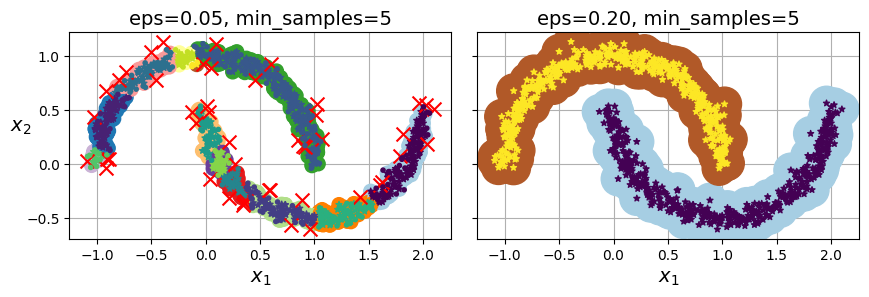

In [78]:
# extra code – this cell generates and saves Figure 9–14

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

In [79]:
dbscan = dbscan2  # extra code – the text says we now use eps=0.2

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [81]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [82]:
knn.predict_proba(X_new)

array([[0.14, 0.86],
       [1.  , 0.  ],
       [0.14, 0.86],
       [1.  , 0.  ]])

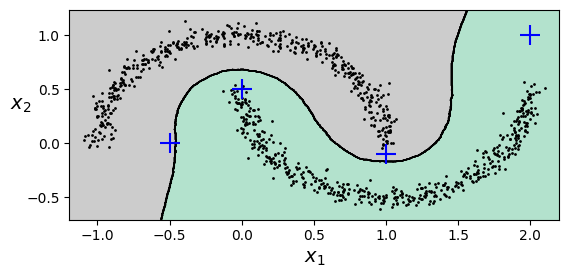

In [83]:
# extra code – this cell generates and saves Figure 9–15

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

In [84]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

> NOTE:  DBSCAN class does not have a predict() method, although
it has a fit_predict() method. In other words, it cannot predict which
cluster a new instance belongs to. This decision was made because different
classification algorithms can be better for different tasks, so the authors
decided to let the user choose which one to use. Moreover, it’s not hard to
implement

In [28]:
# for example, let's train KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn  = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

> NOTE: Note that we only trained the classifier on the core instances, but we could
also have chosen to train it on all the instances, or all but the anomalies: this
choice depends on the final task

>The decision boundary is represented in Figure 9-15 (the crosses represent
the four instances in X_new). Notice that since there is no anomaly in the
training set, the classifier always chooses a cluster, even when that cluster is
far away. It is fairly straightforward to introduce a maximum distance, in
which case the two instances that are far away from both clusters are
classified as anomalies. 


# Conclusion:
> DBSCAN is a very simple yet powerful algorithm capable of
identifying any number of clusters of any shape. It is robust to outliers, and
it has just two hyperparameters (eps and min_samples). If the density
varies significantly across the clusters, however, or if there’s no sufficiently
low-density region around some clusters, DBSCAN can struggle to capture
all the clusters properly. Moreover, its computational complexity is roughly
O(m^2 n), so it does not scale well to large datasets.

>TIP:
You may also want to try hierarchical DBSCAN (HDBSCAN), which is implemented in
the scikit-learn-contrib project, as it is usually better than DBSCAN at finding
clusters of varying densities.


# Other clustering algorithms:
1. Agglomerative clustering: 
>A hierarchy of clusters is built from the bottom up. Think of many tiny
bubbles floating on water and gradually attaching to each other until
there’s one big group of bubbles. Similarly, at each iteration,
agglomerative clustering connects the nearest pair of clusters (starting
with individual instances). If you drew a tree with a branch for every
pair of clusters that merged, you would get a binary tree of clusters,
where the leaves are the individual instances. This approach can capture
clusters of various shapes; it also produces a flexible and informative
cluster tree instead of forcing you to choose a particular cluster scale,
and it can be used with any pairwise distance. It can scale nicely to large
numbers of instances if you provide a connectivity matrix, which is a
sparse m × m matrix that indicates which pairs of instances are
neighbors (e.g., returned by
sklearn.neighbors.kneighbors_graph()). Without a connectivity
matrix, the algorithm does not scale well to large datasets.

2. BIRCH: 
> The balanced iterative reducing and clustering using hierarchies
(BIRCH) algorithm was designed specifically for very large datasets,
and it can be faster than batch k-means, with similar results, as long as
the number of features is not too large (<20). During training, it builds a
tree structure containing just enough information to quickly assign each
new instance to a cluster, without having to store all the instances in the
tree: this approach allows it to use limited memory while handling huge
datasets.

3. Mean-shift: 
> This algorithm starts by placing a circle centered on each instance; then
for each circle it computes the mean of all the instances located within
it, and it shifts the circle so that it is centered on the mean. Next, it
iterates this mean-shifting step until all the circles stop moving (i.e.,
until each of them is centered on the mean of the instances it contains).
Mean-shift shifts the circles in the direction of higher density, until each
of them has found a local density maximum. Finally, all the instances
whose circles have settled in the same place (or close enough) are
assigned to the same cluster. Mean-shift has some of the same features
as DBSCAN, like how it can find any number of clusters of any shape,
it has very few hyperparameters (just one—the radius of the circles,
called the bandwidth), and it relies on local density estimation. But
unlike DBSCAN, mean-shift tends to chop clusters into pieces when
they have internal density variations. Unfortunately, its computational
complexity is O(m^2 n), so it is not suited for large datasets.

4. Affinity propogation:
>In this algorithm, instances repeatedly exchange messages between one
another until every instance has elected another instance (or itself) to
represent it. These elected instances are called exemplars. Each
exemplar and all the instances that elected it form one cluster. In reallife politics, you typically want to vote for a candidate whose opinions
are similar to yours, but you also want them to win the election, so you
might choose a candidate you don’t fully agree with, but who is more
popular. You typically evaluate popularity through polls. Affinity
propagation works in a similar way, and it tends to choose exemplars
located near the center of clusters, similar to k-means. But unlike with
k-means, you don’t have to pick a number of clusters ahead of time: it is
determined during training. Moreover, affinity propagation can deal
nicely with clusters of different sizes. Sadly, this algorithm has a
computational complexity of O(m^2 ), so it is not suited for large datasets.

5. Spectral clustering
> This algorithm takes a similarity matrix between the instances and
creates a low-dimensional embedding from it (i.e., it reduces the
matrix’s dimensionality), then it uses another clustering algorithm in
this low-dimensional space (Scikit-Learn’s implementation uses kmeans). Spectral clustering can capture complex cluster structures, and
it can also be used to cut graphs (e.g., to identify clusters of friends on a
social network). It does not scale well to large numbers of instances, and
it does not behave well when the clusters have very different sizes.



### Spectral Clustering

In [85]:
from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [86]:
sc1.affinity_matrix_.round(2)

array([[1.  , 0.55, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.55, 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.35],
       [0.  , 0.  , 0.  , ..., 0.  , 0.35, 1.  ]])

In [87]:
sc2 = SpectralClustering(n_clusters=2,gamma=1,random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

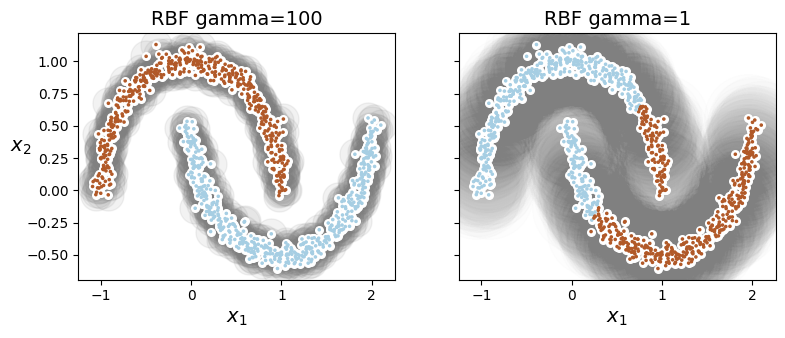

In [89]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True,
                             show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"RBF gamma={sc.gamma}")

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

### Agglomerative Clustering

In [90]:
from sklearn.cluster import AgglomerativeClustering

X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]


In [91]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [92]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

# Gaussian Mixtures:
1. A Gaussian mixture model (GMM) is a probabilistic model that assumes
that the instances were generated from a mixture of several Gaussian
distributions whose parameters are unknown

2. you must know in advance the number k of
Gaussian distributions. The dataset X is assumed to have been generated
through the following probabilistic process:

>For each instance, a cluster is picked randomly from among k clusters.
The probability of choosing the jth cluster is the cluster’s weight ϕ^(j) .
The index of the cluster chosen for the ith instance is noted z^(i) .

>If the ith instance was assigned to the jth cluster (i.e., z^(i) = j), then the location x^(i) of this instance is sampled randomly from the Gaussian
distribution with mean μ^(j) and covariance matrix Σ^(j) . This is noted x^(i)
~ 𝒩(μ^(j) , Σ^(j) ).

In [93]:
# Let's generate the same dataset as earliers with three ellipsoids (the one K-Means had trouble with):

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]


In [95]:
# you typically want to start by estimating the weights ϕ and all the distribution
# parameters μ^(1) to μ^(k) and Σ^(1) to Σ^(k)

# Let's train a Gaussian mixture model on the previous dataset:

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3,n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [96]:
#let's look at the parameters that algo estimated:
print("weights: ",gm.weights_)
print("means: ",gm.means_)
print("covariances: ",gm.covariances_)

weights:  [0.39025715 0.20966893 0.40007391]
means:  [[ 0.05131611  0.07521837]
 [ 3.39893794  1.05928897]
 [-1.40763156  1.42708225]]
covariances:  [[[ 0.68799922  0.79606357]
  [ 0.79606357  1.21236106]]

 [[ 1.14833585 -0.03256179]
  [-0.03256179  0.95490931]]

 [[ 0.63479409  0.72970799]
  [ 0.72970799  1.1610351 ]]]


In [97]:
# did the algorithm acctually converged?
print(gm.converged_)

# how many iteration did it take?
print(gm.n_iter_)

True
4


You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, just use predict() method or the predict_proba() method:

In [98]:
"""Now that you have an estimate of the location, size, shape, orientation, and
relative weight of each cluster, the model can easily assign each instance to
the most likely cluster (hard clustering) or estimate the probability that it
belongs to a particular cluster (soft clustering). Just use the predict()
method for hard clustering, or the predict_proba() method for soft
clustering"""

gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [99]:
gm.predict_proba(X).round(3)

array([[0.977, 0.023, 0.   ],
       [0.983, 0.016, 0.001],
       [0.   , 0.   , 1.   ],
       ...,
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ]])

This is a generative model, so you can sample new instances from it (and get their labels):`

In [101]:
X_new, y_new = gm.sample(6)
X_new,y_new

(array([[ 0.68661285,  0.83808473],
        [-0.00669741, -0.40953837],
        [ 2.17973884,  0.45884507],
        [ 2.9627992 ,  1.566361  ],
        [-1.47660716,  1.99644429],
        [-1.14117191,  1.50374889]]),
 array([0, 0, 1, 1, 2, 2]))

Notice that they are sampled sequentially from each cluster.


You can also estimate the log of the probability density function (PDF) at any location using the score_samples() method:


In [102]:
gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

Let's check that the PDF integrates to 1 over the whole space. We just take a large square around the clusters, and chop it into a grid of tiny squares, then we compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities). The result is very close to 1:

In [103]:
# extra code – bonus material

resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999215022

Now let's plot the resulting decision boundaries (dashed lines) and density contours:

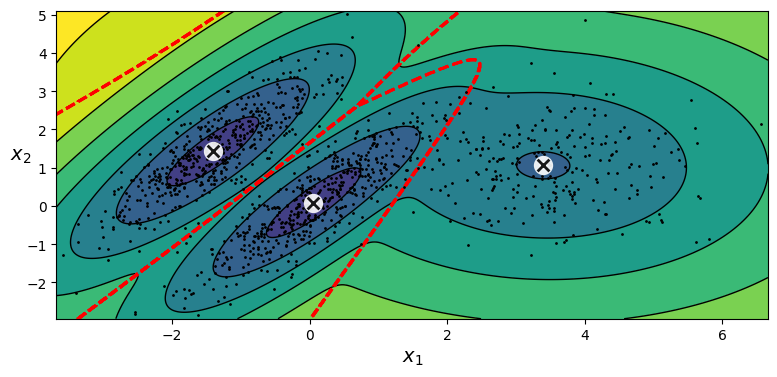

In [104]:
# extra code – this cells generates and saves Figure 9–16

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_plot")
plt.show()

You can impose constraints on the covariance matrices that the algorithm looks for by setting the `covariance_type` hyperparameter:
* `"spherical"`: all clusters must be spherical, but they can have different diameters (i.e., different variances).
* `"diag"`: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).
* `"tied"`: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
* `"full"` (default): no constraint, all clusters can take on any ellipsoidal shape of any size.

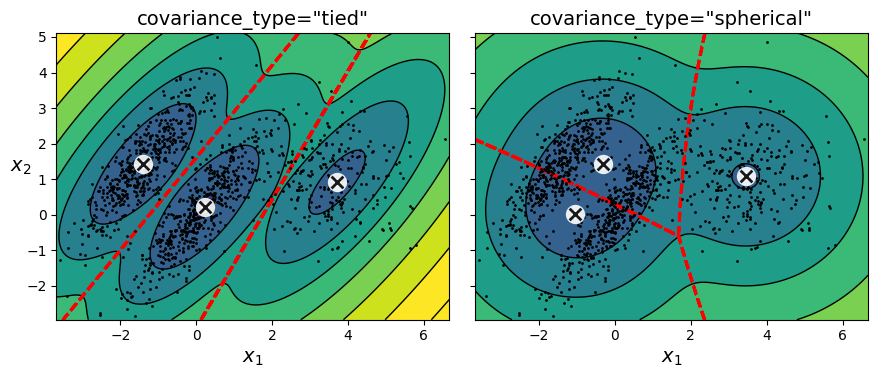

In [105]:
# extra code – this cell generates and saves Figure 9–17

gm_full = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10,
                               covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title(f'covariance_type="{gm1.covariance_type}"')

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title(f'covariance_type="{gm2.covariance_type}"')

compare_gaussian_mixtures(gm_tied, gm_spherical, X)

save_fig("covariance_type_plot")
plt.show()

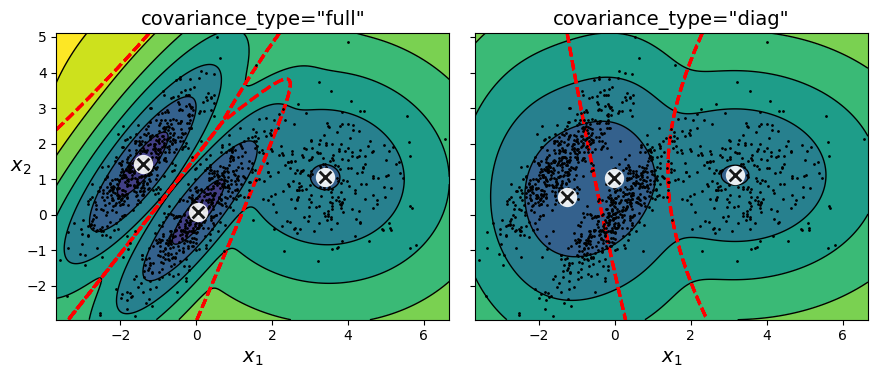

In [106]:
# extra code – comparing covariance_type="full" and covariance_type="diag"
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

# Insights:
1. This class relies on the expectation-maximization (EM) algorithm, which has
many similarities with the k-means algorithm: it also initializes the cluster
parameters randomly, then it repeats two steps until convergence, first
assigning instances to clusters (this is called the expectation step) and then
updating the clusters (this is called the maximization step). Sounds familiar,
right? In the context of clustering, you can think of EM as a generalization
of k-means that not only finds the cluster centers (μ^(1) to μ^(k) ), but also their size, shape, and orientation (Σ^(1) to Σ^(k) ), as well as their relative weights (ϕ^(1) to ϕ^(k) ). Unlike k-means, though, EM uses soft cluster assignments, not hard assignments. For each instance, during the expectation step, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters). Then, during the maximization step, each cluster is updated using all the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster. These probabilities are called the responsibilities of the clusters for the instances. During the maximization step, each cluster’s update will mostly be impacted by the instances it is most responsible for.

>WARNING: 
Unfortunately, just like k-means, EM can end up converging to poor solutions, so it
needs to be run several times, keeping only the best solution. This is why we set n_init
to 10. Be careful: by default n_init is set to 1.

>NOTE: If you compute the exponential of these scores, you get the value of the
PDF at the location of the given instances. These are not probabilities, but
probability densities: they can take on any positive value, not just a value
between 0 and 1. To estimate the probability that an instance will fall within
a particular region, you would have to integrate the PDF over that region (if
you do so over the entire space of possible instance locations, the result will
be 1).





>NOTE:
The computational complexity of training a GaussianMixture model depends on the
number of instances m, the number of dimensions n, the number of clusters k, and the
constraints on the covariance matrices. If covariance_type is "spherical" or "diag",
it is O(kmn), assuming the data has a clustering structure. If covariance_type is
"tied" or "full", it is O(kmn^2 + kn^3 ), so it will not scale to large numbers of features.


### Anomaly Detection Using Gaussian Mixtures
Gaussian Mixtures can be used for anomaly detection: instances located in low-density regions can be considered anomalies. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 2%, then you can set the density threshold to be the value that results in having 2% of the instances located in areas below that threshold density:

In [107]:
"""Here is how you would identify
the outliers using the fourth percentile lowest density as the threshold (i.e.,
approximately 4% of the instances will be flagged as anomalies):"""
densities = gm.score_samples(X)
density_threshold = np.percentile(densities,2)
anomalies = X[densities < density_threshold]

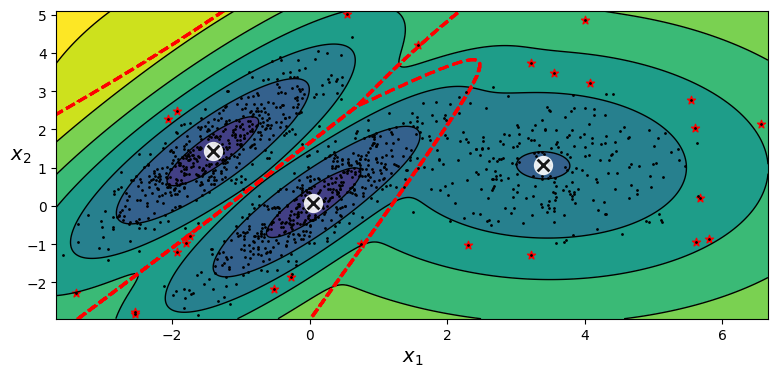

In [108]:
# extra code – this cell generates and saves Figure 9–18

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

1. A closely related task is novelty detection: it differs from anomaly detection
in that the algorithm is assumed to be trained on a “clean” dataset,
uncontaminated by outliers, whereas anomaly detection does not make this
assumption. Indeed, outlier detection is often used to clean up a dataset.

>TIP: Gaussian mixture models try to fit all the data, including the outliers; if you have too
many of them this will bias the model’s view of “normality”, and some outliers may
wrongly be considered as normal. If this happens, you can try to fit the model once, use
it to detect and remove the most extreme outliers, then fit the model again on the
cleaned-up dataset. Another approach is to use robust covariance estimation methods
(see the EllipticEnvelope class).



### Selecting the Number of Clusters:

We cannot use the inertia or the silhouette score because they both assume that the clusters are spherical. Instead, we can try to find the model that minimizes a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ is the number of instances.
* $p$ is the number of parameters learned by the model.
* $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

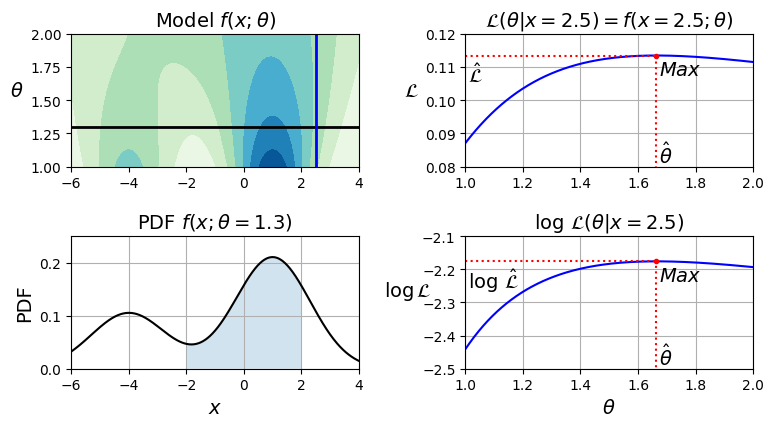

In [109]:
# extra code – this cell generates and saves Figure 9–19

from scipy.stats import norm

x_val = 2.5
std_val = 1.3
x_range = [-6, 4]
x_proba_range = [-2, 2]
stds_range = [1, 2]

xs = np.linspace(x_range[0], x_range[1], 501)
stds = np.linspace(stds_range[0], stds_range[1], 501)
Xs, Stds = np.meshgrid(xs, stds)
Z = 2 * norm.pdf(Xs - 1.0, 0, Stds) + norm.pdf(Xs + 4.0, 0, Stds)
Z = Z / Z.sum(axis=1)[:, np.newaxis] / (xs[1] - xs[0])

x_example_idx = (xs >= x_val).argmax()  # index of the first value >= x_val
max_idx = Z[:, x_example_idx].argmax()
max_val = Z[:, x_example_idx].max()
s_example_idx = (stds >= std_val).argmax()
x_range_min_idx = (xs >= x_proba_range[0]).argmax()
x_range_max_idx = (xs >= x_proba_range[1]).argmax()
log_max_idx = np.log(Z[:, x_example_idx]).argmax()
log_max_val = np.log(Z[:, x_example_idx]).max()

plt.figure(figsize=(8, 4.5))

plt.subplot(2, 2, 1)
plt.contourf(Xs, Stds, Z, cmap="GnBu")
plt.plot([-6, 4], [std_val, std_val], "k-", linewidth=2)
plt.plot([x_val, x_val], [1, 2], "b-", linewidth=2)
plt.ylabel(r"$\theta$", rotation=0, labelpad=10)
plt.title(r"Model $f(x; \theta)$")

plt.subplot(2, 2, 2)
plt.plot(stds, Z[:, x_example_idx], "b-")
plt.plot(stds[max_idx], max_val, "r.")
plt.plot([stds[max_idx], stds[max_idx]], [0, max_val], "r:")
plt.plot([0, stds[max_idx]], [max_val, max_val], "r:")
plt.text(stds[max_idx]+ 0.01, 0.081, r"$\hat{\theta}$")
plt.text(stds[max_idx]+ 0.01, max_val - 0.006, r"$Max$")
plt.text(1.01, max_val - 0.008, r"$\hat{\mathcal{L}}$")
plt.ylabel(r"$\mathcal{L}$", rotation=0, labelpad=10)
plt.title(fr"$\mathcal{{L}}(\theta|x={x_val}) = f(x={x_val}; \theta)$")
plt.grid()
plt.axis([1, 2, 0.08, 0.12])

plt.subplot(2, 2, 3)
plt.plot(xs, Z[s_example_idx], "k-")
plt.fill_between(xs[x_range_min_idx:x_range_max_idx+1],
                 Z[s_example_idx, x_range_min_idx:x_range_max_idx+1], alpha=0.2)
plt.xlabel(r"$x$")
plt.ylabel("PDF")
plt.title(fr"PDF $f(x; \theta={std_val})$")
plt.grid()
plt.axis([-6, 4, 0, 0.25])

plt.subplot(2, 2, 4)
plt.plot(stds, np.log(Z[:, x_example_idx]), "b-")
plt.plot(stds[log_max_idx], log_max_val, "r.")
plt.plot([stds[log_max_idx], stds[log_max_idx]], [-5, log_max_val], "r:")
plt.plot([0, stds[log_max_idx]], [log_max_val, log_max_val], "r:")
plt.text(stds[log_max_idx]+ 0.01, log_max_val - 0.06, r"$Max$")
plt.text(stds[log_max_idx]+ 0.01, -2.49, r"$\hat{\theta}$")
plt.text(1.01, log_max_val - 0.08, r"$\log \, \hat{\mathcal{L}}$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\log\mathcal{L}$", rotation=0, labelpad=10)
plt.title(fr"$\log \, \mathcal{{L}}(\theta|x={x_val})$")
plt.grid()
plt.axis([1, 2, -2.5, -2.1])

save_fig("likelihood_function_plot")
plt.show()

In [110]:
gm.bic(X),gm.aic(X)

(8189.747000497186, 8102.521720382148)

In [111]:
# We could compute the BIC manually like this

# extra code – bonus material
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(f"bic = {bic}")
print(f"aic = {aic}")
print(f"n_params = {n_params}")


bic = 8189.747000497186
aic = 8102.521720382148
n_params = 17


There's one weight per cluster, but the sum must be equal to 1, so we have one degree of freedom less, hence the -1. Similarly, the degrees of freedom for an $n \times n$ covariance matrix is not $n^2$, but $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.

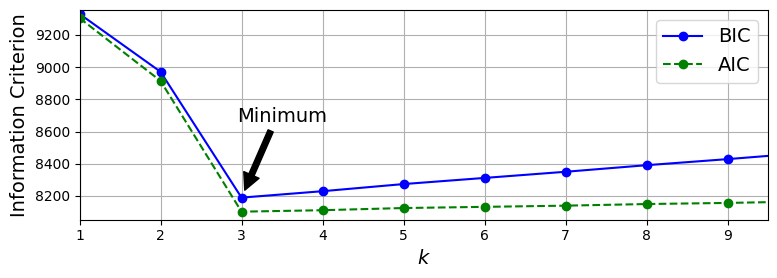

In [112]:
# Let's train Gaussian Mixture models with various values of  k  and measure their BIC:

# extra code – this cell generates and saves Figure 9–20

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.annotate("", xy=(3, bics[2]), xytext=(3.4, 8650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(3.5, 8660, "Minimum", horizontalalignment="center")
plt.legend()
plt.grid()
save_fig("aic_bic_vs_k_plot")
plt.show()


# LIKELIHOOD FUNCTION:

1. The terms “probability” and “likelihood” are often used interchangeably
in everyday language, but they have very different meanings in
statistics. Given a statistical model with some parameters θ, the word
“probability” is used to describe how plausible a future outcome x is
(knowing the parameter values θ), while the word “likelihood” is used
to describe how plausible a particular set of parameter values θ are,
after the outcome x is known.

2. Consider a 1D mixture model of two Gaussian distributions centered at
–4 and +1. For simplicity, this toy model has a single parameter θ that
controls the standard deviations of both distributions. The top-left
contour plot in Figure 9-19 shows the entire model f(x; θ) as a function
of both x and θ. To estimate the probability distribution of a future
outcome x, you need to set the model parameter θ. For example, if you
set θ to 1.3 (the horizontal line), you get the probability density function
f(x; θ=1.3) shown in the lower-left plot. Say you want to estimate the
probability that x will fall between –2 and +2. You must calculate the
integral of the PDF on this range (i.e., the surface of the shaded region).
But what if you don’t know θ, and instead if you have observed a single
instance x=2.5 (the vertical line in the upper-left plot)? In this case, you
get the likelihood function ℒ(θ|x=2.5)=f(x=2.5; θ), represented in the
upper-right plot.



3. In short, the PDF is a function of x (with θ fixed), while the likelihood
function is a function of θ (with x fixed). It is important to understand
that the likelihood function is not a probability distribution: if you
integrate a probability distribution over all possible values of x, you
always get 1, but if you integrate the likelihood function over all
possible values of θ the result can be any positive value.

4. Given a dataset X, a common task is to try to estimate the most likely
values for the model parameters. To do this, you must find the values
that maximize the likelihood function, given X. In this example, if you
have observed a single instance x=2.5, the maximum likelihood estimate
(MLE) of θ is ˆ𝛉=1.5. If a prior probability distribution g over θ exists, it
is possible to take it into account by maximizing ℒ(θ|x)g(θ) rather than
just maximizing ℒ(θ|x). This is called maximum a-posteriori (MAP)
estimation. Since MAP constrains the parameter values, you can think
of it as a regularized version of MLE.

5. Notice that maximizing the likelihood function is equivalent to
maximizing its logarithm (represented in the lower-right plot in
Figure 9-19). Indeed, the logarithm is a strictly increasing function, so
if θ maximizes the log likelihood, it also maximizes the likelihood. It turns out that it is generally easier to maximize the log likelihood. For
example, if you observed several independent instances x to x , you
would need to find the value of θ that maximizes the product of the
individual likelihood functions. But it is equivalent, and much simpler,
to maximize the sum (not the product) of the log likelihood functions,
thanks to the magic of the logarithm which converts products into sums:
log(ab) = log(a) + log(b).
Once you have estimated ˆ𝛉, the value of θ that maximizes the
likelihood function, then you are ready to compute Lˆ=L (ˆ𝛉, X),
which is the value used to compute the AIC and BIC; you can think of
it as a measure of how well the model fits the data

### Bayesian guassian Mixture Models:
Rather than manually searching for the optimal number of clusters, it is possible to use instead the BayesianGaussianMixture class which is capable of giving weights equal (or close) to zero to unnecessary clusters. Just set the number of components to a value that you believe is greater than the optimal number of clusters, and the algorithm will eliminate the unnecessary clusters automatically.

In [113]:
""". For example, let’s set the number of
clusters to 10 and see what happens"""
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

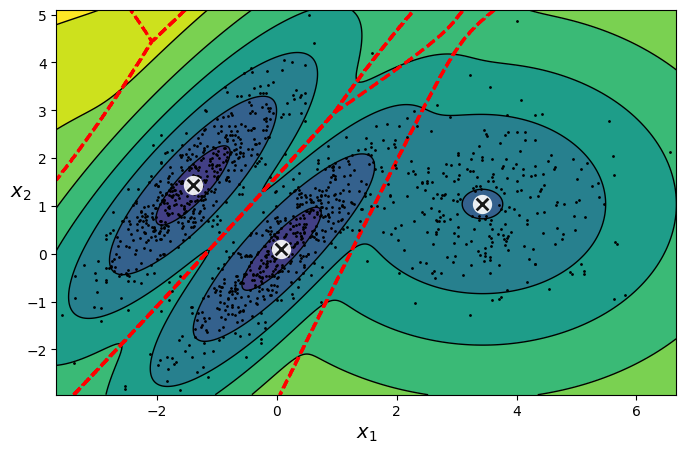

In [114]:
# The algorithm automatically detected that only 3 components are needed!

# extra code – this figure is almost identical to Figure 9–16
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

# Insights:
1. Perfect: the algorithm automatically detected that only 5 clusters are
needed, and the resulting clusters are almost identical to the ones in
Figure 9-16.

2. A final note about Gaussian mixture models: although they work great on
clusters with ellipsoidal shapes, they don’t do so well with clusters of very
different shapes. For example, let’s see what happens if we use a Bayesian
Gaussian mixture model to cluster the moons dataset (see Figure 9-21)


3. Oops! The algorithm desperately searched for ellipsoids, so it found eight
different clusters instead of two. The density estimation is not too bad, so
this model could perhaps be used for anomaly detection, but it failed to
identify the two moons. To conclude this chapter, let’s take a quick look at a
few algorithms capable of dealing with arbitrarily shaped clusters.




C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


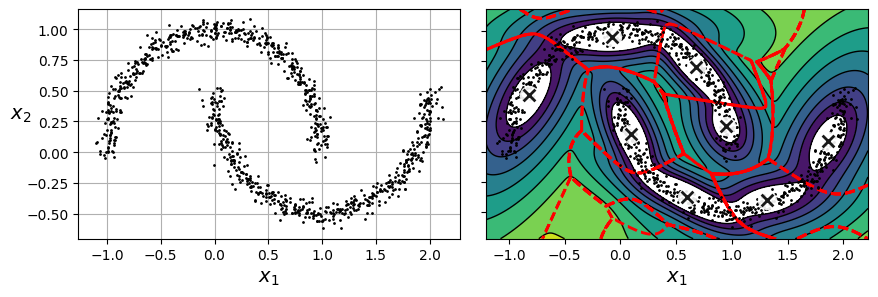

In [115]:
# extra code – this cell generates and saves Figure 9–21

X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.grid()

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

save_fig("moons_vs_bgm_plot")
plt.show()

Oops, not great... instead of detecting 2 moon-shaped clusters, the algorithm detected 8 ellipsoidal clusters. However, the density plot does not look too bad, so it might be usable for anomaly detection.

# Other Algos For anomaly and Novelty Detection:
1. Fast-MCD(minimum covariance determinant):
> Implemented by the EllipticEnvelope class, this algorithm is useful
for outlier detection, in particular to clean up a dataset. It assumes that
the normal instances (inliers) are generated from a single Gaussian
distribution (not a mixture). It also assumes that the dataset is
contaminated with outliers that were not generated from this Gaussian
distribution. When the algorithm estimates the parameters of the
Gaussian distribution (i.e., the shape of the elliptic envelope around the
inliers), it is careful to ignore the instances that are most likely outliers.
This technique gives a better estimation of the elliptic envelope and thus
makes the algorithm better at identifying the outliers.

2. Isolation forset: 
> This is an efficient algorithm for outlier detection, especially in highdimensional datasets. The algorithm builds a random forest in which
each decision tree is grown randomly: at each node, it picks a feature
randomly, then it picks a random threshold value (between the min and
max values) to split the dataset in two. The dataset gradually gets
chopped into pieces this way, until all instances end up isolated from the
other instances. Anomalies are usually far from other instances, so on
average (across all the decision trees) they tend to get isolated in fewer
steps than normal instances.

3. Local outlier factor(LOF):
>This algorithm is also good for outlier detection. It compares the density
of instances around a given instance to the density around its neighbors.
An anomaly is often more isolated than its k-nearest neighbors.

4. One-class SVM:
> This algorithm is better suited for novelty detection. Recall that a
kernelized SVM classifier separates two classes by first (implicitly)
mapping all the instances to a high-dimensional space, then separating
the two classes using a linear SVM classifier within this highdimensional space (see Chapter 5). Since we just have one class of
instances, the one-class SVM algorithm instead tries to separate the
instances in high-dimensional space from the origin. In the original
space, this will correspond to finding a small region that encompasses
all the instances. If a new instance does not fall within this region, it is
an anomaly. There are a few hyperparameters to tweak: the usual ones
for a kernelized SVM, plus a margin hyperparameter that corresponds to
the probability of a new instance being mistakenly considered as novel
when it is in fact normal. It works great, especially with highdimensional datasets, but like all SVMs it does not scale to large
datasets.

5. PCA and other dims reduction techniques with an inverse_transform() method:
> If you compare the reconstruction error of a normal instance with the
reconstruction error of an anomaly, the latter will usually be much
larger. This is a simple and often quite efficient anomaly detection
approach.